[Current - Northern Territory Crime Statistics May 2022](https://data.nt.gov.au/dataset/current-northern-territory-crime-statistics-may-2022)

Offences in the Northern Territory can show strong seasonal patterns, with predictable peaks and troughs at certain times of the year.  Therefore, comparisons should be made of the same months in different years, rather than consecutive months.  For trends, a 12-month rolling average or rolling sum is recommended in order to dampen the month-to-month variability and account for the seasonal cycles.

Last update was July 1st 2022.

In 2017, the governments of the UK, Germany and Canada issued travel advisories to their citizens travelling in Australia, singling out Alice Springs as a place where extra precautions should be taken: "Take care in the town centre of Alice Springs at night. There have been a number of incidents of harassment, robberies and attacks (including sexual assault) on foreign tourists." (UK).

"Foreign travellers warned about visiting Alice Springs". The New Daily. 15 March 2017. Retrieved 9 October 2019.

Webb, Carolyn (15 March 2017). "Foreign tourists warned on Alice Springs safety risks". The Sydney Morning Herald. Retrieved 9 October 2019.

"The Northern Territory is the Murder Capital of Australia." The Guardian. 18 June 2013.   https://www.theguardian.com/news/datablog/2013/jun/18/australia-new-crime-statistics. Retrieved 15 August 2021 

![Murder Capital of Australia](murder_capital.png)

In [116]:
# Standard Data Science Helpers
import numpy as np
import pandas as pd
import scipy

import plotly.graph_objs as go
import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output

from ipywidgets import widgets

import chart_studio.plotly as py

from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(colorscale='plotly', world_readable=True)

# Extra options
pd.options.display.max_rows = 30
pd.options.display.max_columns = 25

# Show all code cells outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import os
from IPython.display import Image, display, HTML

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [75]:
dv_df = pd.read_csv('nt_crime_statistics_may_2022.csv')

In [76]:
dv_df.head()

,As At,Year,Month number,Offence category,Offence type,Alcohol involvement,DV involvement,Reporting region,Statistical Area 2,Number of offences
0,1/07/2022,2008,1,Abduction - harassment and other offences agai...,Deprivation of liberty /false imprisonment,-,-,Alice Springs,-,1
1,1/07/2022,2008,1,Abduction - harassment and other offences agai...,Deprivation of liberty /false imprisonment,-,-,NT Balance,Alligator,1
2,1/07/2022,2008,1,Abduction - harassment and other offences agai...,Deprivation of liberty /false imprisonment,-,-,Tennant Creek,-,1
3,1/07/2022,2008,1,Abduction - harassment and other offences agai...,Harassment and private nuisance,-,-,NT Balance,Alligator,2
4,1/07/2022,2008,1,Abduction - harassment and other offences agai...,Harassment and private nuisance,-,-,NT Balance,Daly,1


In [77]:
dv_df.tail()

,As At,Year,Month number,Offence category,Offence type,Alcohol involvement,DV involvement,Reporting region,Statistical Area 2,Number of offences
44989,1/07/2022,2022,5,Theft and related offences (other than MV),Theft and related offences (other than MV),-,-,NT Balance,Weddell,5
44990,1/07/2022,2022,5,Theft and related offences (other than MV),Theft and related offences (other than MV),-,-,NT Balance,West Arnhem,8
44991,1/07/2022,2022,5,Theft and related offences (other than MV),Theft and related offences (other than MV),-,-,NT Balance,Yuendumu - Anmatjere,8
44992,1/07/2022,2022,5,Theft and related offences (other than MV),Theft and related offences (other than MV),-,-,Palmerston,-,70
44993,1/07/2022,2022,5,Theft and related offences (other than MV),Theft and related offences (other than MV),-,-,Tennant Creek,-,7


In [78]:
dv_df.describe()

,Year,Month number,Number of offences
count,44994.000000,44994.000000,44994.000000
mean,2014.867649,6.410366,9.346602
std,4.163936,3.495179,26.984379
min,2008.000000,1.000000,1.000000
25%,2011.000000,3.000000,1.000000
50%,2015.000000,6.000000,3.000000
75%,2018.000000,10.000000,6.000000
max,2022.000000,12.000000,458.000000


<p style='color: red'> The number of offences is the number of offences recorded per region per statistical area. The highest number of offences ever recorded is 458 property damage offences in Darwin in January 2010. </p>

* group together reporting region and statistical area.
* statistical area with maximum offences
* look into the type of offence prevalent in statistical area.
* look into the maximum offences per region.

In [79]:
dv_df[dv_df['Number of offences'] == 458]

,As At,Year,Month number,Offence category,Offence type,Alcohol involvement,DV involvement,Reporting region,Statistical Area 2,Number of offences
6111,1/07/2022,2010,1,Property Damage Offences,Property damage offences,-,-,Darwin,-,458


In [80]:
dv_df[(dv_df['Year'] == 2010) & (dv_df['Month number'] == 1) & (dv_df['Offence category'] == 'Property Damage Offences')]

,As At,Year,Month number,Offence category,Offence type,Alcohol involvement,DV involvement,Reporting region,Statistical Area 2,Number of offences
6110,1/07/2022,2010,1,Property Damage Offences,Property damage offences,-,-,Alice Springs,-,200
6111,1/07/2022,2010,1,Property Damage Offences,Property damage offences,-,-,Darwin,-,458
6112,1/07/2022,2010,1,Property Damage Offences,Property damage offences,-,-,Katherine,-,22
6113,1/07/2022,2010,1,Property Damage Offences,Property damage offences,-,-,Nhulunbuy,-,6
6114,1/07/2022,2010,1,Property Damage Offences,Property damage offences,-,-,NT Balance,Alligator,13
6115,1/07/2022,2010,1,Property Damage Offences,Property damage offences,-,-,NT Balance,Anindilyakwa,3
6116,1/07/2022,2010,1,Property Damage Offences,Property damage offences,-,-,NT Balance,Barkly,3
6117,1/07/2022,2010,1,Property Damage Offences,Property damage offences,-,-,NT Balance,Daly,2
6118,1/07/2022,2010,1,Property Damage Offences,Property damage offences,-,-,NT Balance,East Arnhem,7
6119,1/07/2022,2010,1,Property Damage Offences,Property damage offences,-,-,NT Balance,Elsey,2


In [81]:
dv_df.shape

(44994, 10)

In [82]:
dv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44994 entries, 0 to 44993
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   As At                44994 non-null  object
 1   Year                 44994 non-null  int64 
 2   Month number         44994 non-null  int64 
 3   Offence category     44994 non-null  object
 4   Offence type         44994 non-null  object
 5   Alcohol involvement  44994 non-null  object
 6   DV involvement       44994 non-null  object
 7   Reporting region     44994 non-null  object
 8   Statistical Area 2   44994 non-null  object
 9   Number of offences   44994 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 3.4+ MB


In [83]:
dv_df = dv_df.drop('As At', axis = 1)

In [84]:
dv_df.keys()

Index(['Year', 'Month number', 'Offence category', 'Offence type',
       'Alcohol involvement', 'DV involvement', 'Reporting region ',
       'Statistical Area 2', 'Number of offences'],
      dtype='object')

<h1 style="color:blue">Offence Category Counts</h1>

<span style="color:blue"> Although it is a relief that homicide and related offences have the least amount of occurences, it is quite alarming that acts intended to cause injury has the highest count among the crimes reported.</span> 

<AxesSubplot:ylabel='Number of offences'>

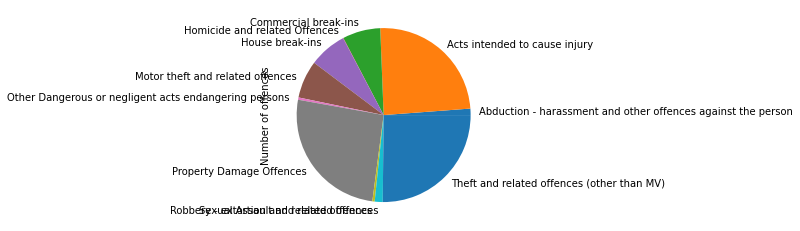

In [144]:
dv_df.groupby('Offence category')['Number of offences'].sum().plot(kind = 'pie')

<AxesSubplot:ylabel='Offence category'>

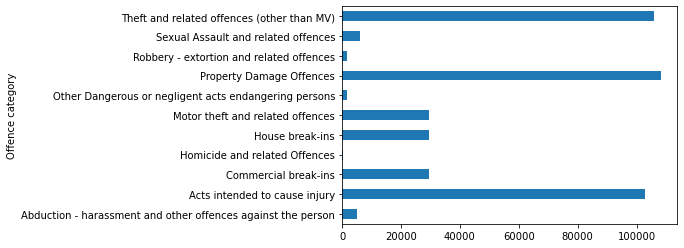

In [145]:
dv_df.groupby('Offence category')['Number of offences'].sum().plot(kind = 'barh')

In [139]:
dv_df[dv_df['Offence category'] == 'Homicide and related Offences']

,Year,Month number,Offence category,Offence type,Alcohol involvement,DV involvement,Reporting region,Statistical Area 2,Number of offences
370,2008,2,Homicide and related Offences,Murder,-,-,Katherine,-,1
841,2008,4,Homicide and related Offences,Manslaughter,-,-,Darwin,-,1
842,2008,4,Homicide and related Offences,Murder,-,-,NT Balance,Gulf,1
1090,2008,5,Homicide and related Offences,Manslaughter,-,-,Darwin,-,1
1091,2008,5,Homicide and related Offences,Manslaughter,-,-,Palmerston,-,1
...,...,...,...,...,...,...,...,...,...
44584,2022,4,Homicide and related Offences,Driving causing death,-,-,NT Balance,Victoria River,1
44585,2022,4,Homicide and related Offences,Manslaughter,-,-,Alice Springs,-,1
44586,2022,4,Homicide and related Offences,Murder,-,-,Darwin,-,1
44868,2022,5,Homicide and related Offences,Driving causing death,-,-,Alice Springs,-,1


<AxesSubplot:ylabel='Offence category'>

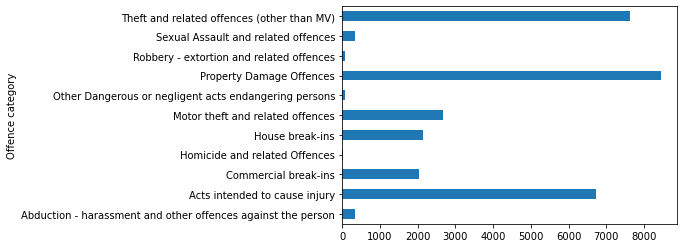

In [138]:
dv_df[dv_df['Year'] == 2010].groupby('Offence category')['Number of offences'].sum().plot(kind = 'barh')

In [136]:
dv_df.groupby('Offence category')['Number of offences'].sum()

Offence category
Abduction - harassment and other offences against the person      5027
Acts intended to cause injury                                   102739
Commercial break-ins                                             29600
Homicide and related Offences                                      248
House break-ins                                                  29496
Motor theft and related offences                                 29486
Other Dangerous or negligent acts endangering persons             1787
Property Damage Offences                                        108292
Robbery - extortion and related offences                          1809
Sexual Assault and related offences                               6248
Theft and related offences (other than MV)                      105809
Name: Number of offences, dtype: int64

<h1 style='color:blue'> Which region has the highest number of offences? </h1> 
<p style='color:blue'> The pie chart below shows that majority of the cases reported occurred in NT Balance.</p>

<AxesSubplot:ylabel='Regions'>

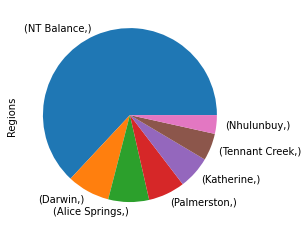

In [87]:
dv_df[['Reporting region ']].value_counts().plot(kind = 'pie', ylabel='Regions')

<p style='color: red'> There were 28,878 cases out of the total cases that were left blank. It can be assumed here that the alcohol involvement was unknown. Replace all - with Alcohol involvement unknown</p>

In [88]:
dv_df[['Alcohol involvement']].value_counts()

Alcohol involvement        
-                              28878
Alcohol involved                5952
No alcohol involved             5925
Alcohol involvement unknown     4239
dtype: int64

<p style='color: red'> There were 28,878 cases out of the total cases that were left blank. It can be assumed here that the domestic violence involvement was unknown. Replace all - with Domestic violence involvement unknown</p>

In [89]:
dv_df[['DV involvement']].value_counts()

DV involvement
-                 28878
DV                 8965
Non-DV             7151
dtype: int64

In [90]:
dv_df[['DV involvement']].isna().sum()

DV involvement    0
dtype: int64

In [91]:
# look into crime by date
#  look into crime by territory
#  crime by season

In [92]:
dv_df['Year'].sort_values().value_counts(sort = False)

2008    2869
2009    3047
2010    2995
2011    2992
2012    3062
2013    3103
2014    3114
2015    3062
2016    3158
2017    3249
2018    3255
2019    3171
2020    3158
2021    3349
2022    1410
Name: Year, dtype: int64

In [132]:
dv_df[dv_df['Offence category'] == 'Abduction - harassment and other offences against the person']['Number of offences'].sum()

5027

In [130]:
dv_df['Offence category'].value_counts()

Acts intended to cause injury                                   16411
Commercial break-ins                                             5007
Motor theft and related offences                                 4240
Property Damage Offences                                         4210
Theft and related offences (other than MV)                       4155
House break-ins                                                  4086
Abduction - harassment and other offences against the person     2690
Sexual Assault and related offences                              2318
Other Dangerous or negligent acts endangering persons            1008
Robbery - extortion and related offences                          633
Homicide and related Offences                                     236
Name: Offence category, dtype: int64

<p style='color: red'> Metadata states that the number of offences fluctuate depending on season but there is not much deviation in the number of offences reported for each month from 2008 - 2022.</p>
* Create a widget that shows bar graph per year. 
* Create bar graph with month in different colors showing crime fluctuation by month and year.

In [94]:
dv_df[dv_df['Year'] == 2022]['Month number'].value_counts(sort = False)

1    293
2    266
3    293
4    282
5    276
Name: Month number, dtype: int64

<AxesSubplot:>

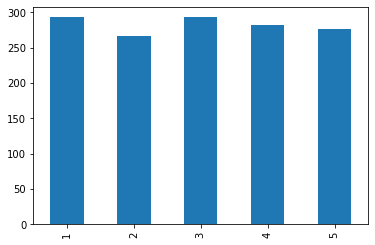

In [95]:
dv_df[dv_df['Year'] == 2022]['Month number'].value_counts(sort = False).plot(kind = 'bar')

<AxesSubplot:>

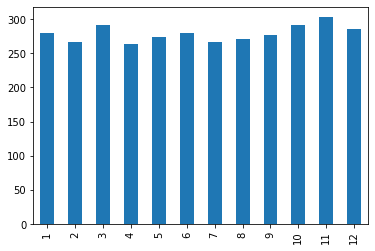

In [96]:
dv_df[dv_df['Year'] == 2021]['Month number'].value_counts(sort = False).plot(kind = 'bar')

<AxesSubplot:>

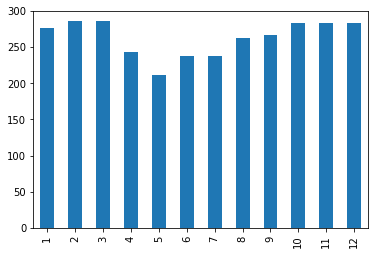

In [97]:
dv_df[dv_df['Year'] == 2020]['Month number'].value_counts(sort = False).plot(kind = 'bar')

<AxesSubplot:>

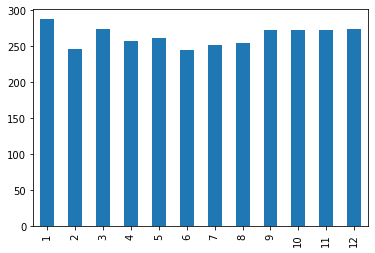

In [98]:
dv_df[dv_df['Year'] == 2019]['Month number'].value_counts(sort = False).plot(kind = 'bar')

<AxesSubplot:>

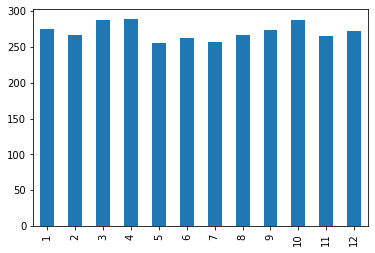

In [99]:
dv_df[dv_df['Year'] == 2018]['Month number'].value_counts(sort = False).plot(kind = 'bar')

<AxesSubplot:>

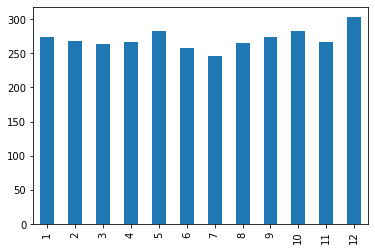

In [100]:
dv_df[dv_df['Year'] == 2017]['Month number'].value_counts(sort = False).plot(kind = 'bar')

<AxesSubplot:>

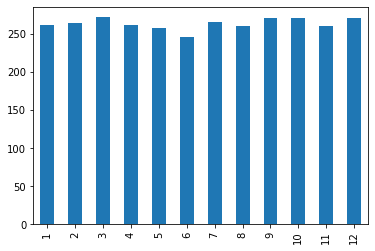

In [101]:
dv_df[dv_df['Year'] == 2016]['Month number'].value_counts(sort = False).plot(kind = 'bar')

<AxesSubplot:>

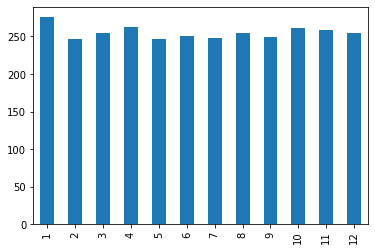

In [102]:
dv_df[dv_df['Year'] == 2015]['Month number'].value_counts(sort = False).plot(kind = 'bar')

<AxesSubplot:>

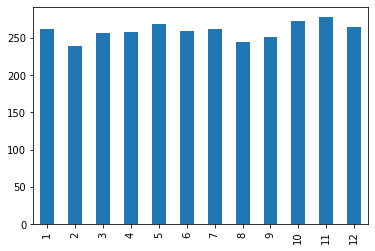

In [103]:
dv_df[dv_df['Year'] == 2014]['Month number'].value_counts(sort = False).plot(kind = 'bar')

In [104]:
dv_df['Year'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021, 2022])

In [105]:
dv_df['Year'].unique().tolist()

[2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022]

In [113]:
year = widgets.IntSlider(
    value=2008,
    min=2008,
    max=2022,
    step=1,
    description='Year:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
)

container = widgets.HBox(children=[year])


In [121]:
def response(change):
    temp_df = dv_df['Year']
    

In [120]:
@interact
def yearly_offences_bar(x=list(dv_df.select_dtypes('number').columns), 
                 y=list(dv_df.select_dtypes('number').columns)[1:]):
    dv_df.iplot(kind='bar', x=x, y=y, mode='markers', 
             xTitle=x.title(), yTitle=y.title(), title=f'{y.title()} vs {x.title()}')

interactive(children=(Dropdown(description='x', options=('Year', 'Month number', 'Number of offences'), value=…